In [1]:
# Logistic Regression (Classification)
# Instead of predicting a numeric value as like in LINEAR REGRESSION,
# it predicts the probability of a class

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [5]:
# Reda the data from CSV
df = pd.read_csv("iris.csv")
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [7]:
# Get unique variety
df['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [9]:
# Encode variety
le = LabelEncoder()
df["variety_encoded"] = le.fit_transform(df['variety'])
df['variety_encoded'].unique()

array([0, 1, 2])

In [10]:
# Features and target
X = df[['sepal.length','sepal.width','petal.length','petal.width']]
y = df['variety_encoded']

In [12]:
# Model
model = LogisticRegression(max_iter=500)
model.fit(X,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,500
,multi_class,'deprecated'


In [15]:
# Predict
model.predict([[6.2,3.4,5.4,2.3]])

e:\Code\Lectures\Python-ML-Django-June-2025\mlvenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([2])

In [19]:
# Equation
classes = le.classes_
coefs = model.coef_
intercepts = model.intercept_

for i, cls in enumerate(classes):
    print(
        f"""logit(P({cls})) = {coefs[i,0]:.2f} * sepal.length + {coefs[i,1]:.2f} * sepal.width + {coefs[i,2]:.2f} * petal.length + {coefs[i,3]:.2f} * petal.length + {intercepts[i]:.2f}"""
    )

logit(P(Setosa)) = -0.42 * sepal.length + 0.97 * sepal.width + -2.52 * petal.length + -1.08 * petal.length + 9.84
logit(P(Versicolor)) = 0.53 * sepal.length + -0.32 * sepal.width + -0.20 * petal.length + -0.94 * petal.length + 2.22
logit(P(Virginica)) = -0.11 * sepal.length + -0.65 * sepal.width + 2.72 * petal.length + 2.03 * petal.length + -12.06


In [21]:
# Plot decision boundaries
X_plot = df[['sepal.length', 'sepal.width']]
y_plot = df['variety_encoded']

In [22]:
model_2d = LogisticRegression(max_iter=500).fit(X_plot, y_plot)

In [30]:
x_min, x_max = X_plot.iloc[:, 0].min()-0.5, X_plot.iloc[:, 0].max()+0.5
y_min, y_max = X_plot.iloc[:, 1].min()-0.5, X_plot.iloc[:, 1].max()+0.5

In [32]:
xx , yy = np.meshgrid(
    np.linspace(x_min, x_max, 200),
    np.linspace(y_min, y_max, 200)
)

In [35]:
z = model_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

e:\Code\Lectures\Python-ML-Django-June-2025\mlvenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


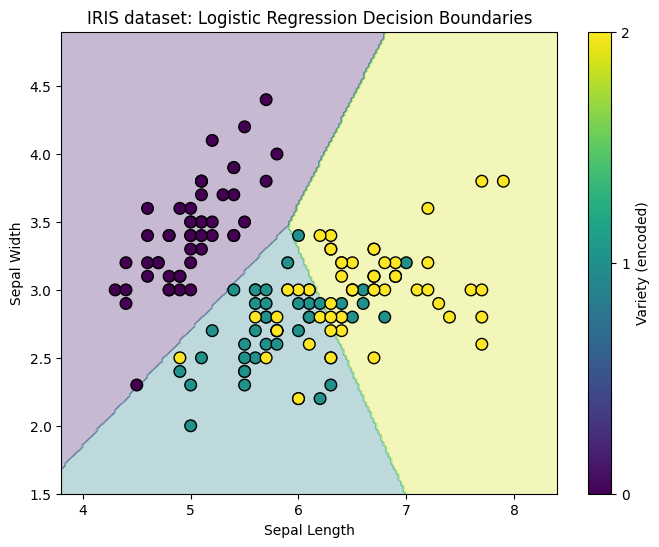

In [39]:
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, z, alpha=0.3, cmap='viridis')
scatter = plt.scatter(X_plot.iloc[:,0], X_plot.iloc[:, 1], c=y_plot, cmap="viridis", edgecolors='k', s=70)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('IRIS dataset: Logistic Regression Decision Boundaries')
plt.colorbar(scatter, ticks=[0,1,2], label="Variety (encoded)")